# Martin Flow Calculations


## Parameters

In [1]:
volume = 400                    # litres
circulation = 100               # litres/minute
fibre_av_length_start = 10      # millimeters
fibre_av_length_finish = 0.1    # mm
cycles_to_process = 20          # Cycles to go from av start to end fibre length

time_one_cycle = volume / circulation                    # minutes ... circulate the entire volume
time_one_process = cycles_to_process * time_one_cycle    # minutes ... process to get target av fibre length

# Content flow
flow_in  = 2      # litres / minute
flow_out = 2      # litres / minute

# Stabilsation
stabilisation_factor = .0001   # if the av length change between cycles is < .01% then stabilasation has occurred

print("One cycle takes:   "+str(time_one_cycle)+" minutes")
print("One process takes: "+str(time_one_process)+" minutes")

One cycle takes:   4.0 minutes
One process takes: 80.0 minutes


## Change in Fibre Lengths
### Start with full volume no adding or removing of contents

In [2]:
# Assume average fibre length change per circulation is linear

delta_fibre_length_cycle  = 1 / cycles_to_process
delta_fibre_length_minute = 1 / time_one_process

print("delta_fibre_length_cycle:   "+str(delta_fibre_length_cycle)+" %")
print("delta_fibre_length_minute: "+str(delta_fibre_length_minute)+" %")

delta_fibre_length_cycle:   0.05 %
delta_fibre_length_minute: 0.0125 %


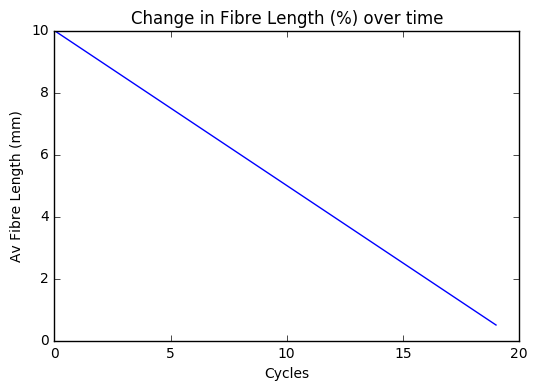



Data Points: [10, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5]


In [3]:

import matplotlib.pyplot as plt

data = []
i = fibre_av_length_start
while i >= fibre_av_length_finish:
    data.append(i)
    i -= fibre_av_length_start*delta_fibre_length_cycle

plt.figure
plt.title('Change in Fibre Length (%) over time', size = 'large')
plt.xlabel("Cycles")
plt.ylabel("Av Fibre Length (mm)")
plt.plot(data)
plt.show()

print("\n\nData Points: " + str(data))

##  Run for full processing cycle THEN start content flow
Start with full volume for full processing cycle so that the target average length has been reached\n
THEN start the content flow

0.1


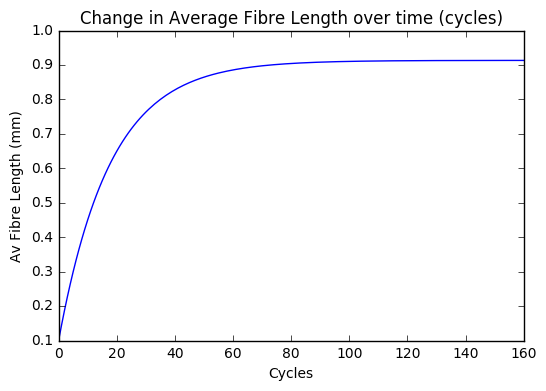

=== SUMMARY ================== 
Length stabilisation occurs at cycle: 159 ... after 636.0 minutes.
with averagle length of: 0.9131


Data Points: [0.1, 0.144525, 0.186612, 0.226395, 0.264, 0.299546, 0.333146, 0.364906, 0.394928, 0.423305, 0.450129, 0.475485, 0.499452, 0.522107, 0.543522, 0.563764, 0.582898, 0.600984, 0.61808, 0.63424, 0.649516, 0.663955, 0.677603, 0.690504, 0.702699, 0.714226, 0.725123, 0.735422, 0.745158, 0.75436, 0.763059, 0.771282, 0.779054, 0.786401, 0.793345, 0.79991, 0.806115, 0.81198, 0.817524, 0.822765, 0.827718, 0.832401, 0.836827, 0.84101, 0.844965, 0.848703, 0.852237, 0.855577, 0.858734, 0.861718, 0.864539, 0.867206, 0.869726, 0.872109, 0.874361, 0.876489, 0.878502, 0.880404, 0.882202, 0.883901, 0.885507, 0.887026, 0.888461, 0.889818, 0.8911, 0.892313, 0.893459, 0.894542, 0.895566, 0.896533, 0.897448, 0.898313, 0.89913, 0.899903, 0.900633, 0.901324, 0.901976, 0.902593, 0.903176, 0.903727, 0.904248, 0.90474, 0.905206, 0.905646, 0.906062, 0.906455, 0.906826, 0

In [ ]:
start_volume = volume
start_av_length = fibre_av_length_finish #fibre_av_length_start
prev_av_length = start_av_length
print(start_av_length)
data = [start_av_length]
stabilisation_point = 0
for i in range(cycles_to_process*8):
    new_av_length = ( prev_av_length*(start_volume-flow_out)*(1-delta_fibre_length_cycle)
                      + flow_in*fibre_av_length_start) / volume
    # check if equilibrium has been reached
    if (prev_av_length-new_av_length)/prev_av_length < stabilisation_factor:
        stabilisation_point = i
       # break
    
    # remember length for next iteration
    prev_av_length = new_av_length
    # round it to 4 decimal places
    new_av_length = float("{0:.6f}".format(new_av_length))
    # add it to the list to graph
    data.append(new_av_length)
    
    
# Plot it
plt.figure
plt.title('Change in Average Fibre Length over time (cycles)', size = 'large')
plt.xlabel("Cycles")
plt.ylabel("Av Fibre Length (mm)")
plt.plot(data)
plt.show()

print("=== SUMMARY ================== ")
print("Length stabilisation occurs at cycle: "+str(stabilisation_point)+" ... after "+str(stabilisation_point*time_one_cycle)+" minutes.")
print("with averagle length of: "+str(float("{0:.4f}".format(prev_av_length))))
print("\n\nData Points: " + str(data))

##  Run with content flow
Start with full volume with the content flow started from the beginning

In [ ]:
start_volume = volume
start_av_length = fibre_av_length_start
prev_av_length = start_av_length
print(start_av_length)
data = [start_av_length]
stabilisation_point = 0
print(prev_av_length)
print(fibre_av_length_finish)
while prev_av_length > fibre_av_length_finish:
    new_av_length = ( prev_av_length*(start_volume-flow_out)*(1-delta_fibre_length_cycle)
                      + flow_in*fibre_av_length_start) / volume
    print(new_av_length)
    # remember length for next iteration
    prev_av_length = new_av_length
    # round it to 4 decimal places
    new_av_length = float("{0:.6f}".format(new_av_length))
    # add it to the list to graph
    data.append(new_av_length)
    
    
# Plot it
plt.figure
plt.title('Change in Average Fibre Length over time (cycles)', size = 'large')
plt.xlabel("Cycles")
plt.ylabel("Av Fibre Length (mm)")
plt.plot(data)
plt.show()

print("=== SUMMARY ================== ")
print("Length stabilisation occurs at cycle: "+str(stabilisation_point)+" ... after "+str(stabilisation_point*time_one_cycle)+" minutes.")
print("with averagle length of: "+str(float("{0:.4f}".format(prev_av_length))))
print("Stabilisation is when change between cycles < "+str(stabilisation_factor))
print("\n\nData Points: " + str(data))

10
10
0.1
9.5025
9.032238125
8.587723087656249
8.167545248607068
7.770372146245831
7.394944271238871
7.0400710723885425
6.70462718117527
6.387548843005923
6.087830543851347
5.804521821575486
5.536724251844228
5.283588599055756
5.044312123257453
4.818136034509107
4.604343086619733
4.402255302627302
4.211231824808458
4.030666882400195
3.859987870588784
3.6986535346740474
3.546152253650643
3.40200041776327
3.2657408948907314
3.1369415808954635
3.0151940293414365
2.9001121562349925
2.791331015681127
2.6885056425725855
2.591309958641736
2.499435738406101
2.412591631728367
2.330502239891239
2.252907242257194
2.1795605707436123
2.1102296294953997
2.0446945572805264
1.9827475302694177
1.9241921029871671
1.8688425853486197
1.8165234538007828
1.7670687947051897
1.7203217781950804
1.6761341608388998
1.6343658155329701
1.59488428713254
1.5575643724120334
1.5222877230224745
1.488942470186994
1.457422869944256
1.427628967814808
1.3994662818269472
1.3728455028969215
1.347682211613315
1.32389661052748